# Figure 1, part 2

Removed splicing events in genes with TPM < 1 in Notebook `1.1 Supplementary Figure 1`.

In [1]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-05-13 11:29:15	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2016-05-13 11:29:15	Parsing datapackage to create a Study object
2016-05-13 11:29:49	Initializing Study
2016-05-13 11:29:49	Initializing Predictor configuration manager for Study
2016-05-13 11:29:49	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-13 11:29:49	Added ExtraTreesClassifier to default predictors
2016-05-13 11:29:49	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-13 11:29:49	Added ExtraTreesRegressor to default predictors
2016-05-13 11:29:49	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-13 11:29:49	Added GradientBoostingClassifier to default predictors
2016-05-13 11:29:49	Predictor GradientBoostingRegressor is of typ

In [2]:
study.expression.data.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [3]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [4]:
# study.metadata._phenotype_to_color = {u'MN': u'#228a44',
#                                      u'NPC': u'#73c476',
#                                      u'iPSC': u'#c7e9c0'}

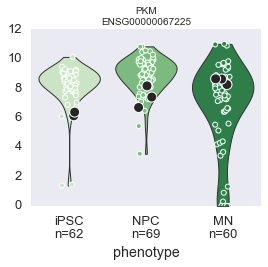

In [5]:
with sns.axes_style('dark'):
    study.plot_gene('PKM', sample_subset='~outlier')
    fig = plt.gcf()
    for ax in fig.axes:
        ax.set(ylim=(0, 12))
    fig.savefig('{}/pkm_violin.pdf'.format(folder))

### Number of splicing events in non-differentially expressed genes

In [6]:
from flotilla.compute.expression import differential_expression


In [7]:
singles_not_outliers = study.expression.singles.loc[~study.expression.singles.index.isin(study.expression.outlier_samples)]
singles_not_outliers.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [8]:
differential_results = differential_expression(singles_not_outliers, groupby=study.sample_id_to_phenotype)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/compute/expression.py:234: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  de_results = de_results.sort('bonferonni_p_value')


In [9]:
differential_results.head()

,gene_id,U_statistic,p_value,bonferonni_p_value
0,ENSG00000234273,180.609954,6.040138e-40,1.123103e-35
1,ENSG00000258417,180.609954,6.040138e-40,1.123103e-35
2,ENSG00000167600,180.609954,6.040138e-40,1.123103e-35
3,ENSG00000249152,180.609954,6.040138e-40,1.123103e-35
4,ENSG00000136110,178.790459,1.500186e-39,2.789447e-35


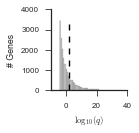

In [10]:
differential_results['log10_bonferonni_p_value'] = -np.log10(differential_results.bonferonni_p_value)

log_p_cutoff = 2

sns.set(style='ticks', context='paper')
fig, ax = plt.subplots(figsize=(2, 2))
# plt.yscale('log', nonposy='clip')

sns.distplot(differential_results['log10_bonferonni_p_value'], color='grey', kde=False)
ymin, ymax = ax.get_ylim()
ax.locator_params(nbins=4)

ax.vlines(log_p_cutoff, ymin, ymax, linestyle='--')
ax.set(ylabel='# Genes', xlabel='$\log_{10}(q)$')
sns.despine()

fig.tight_layout()
fig.savefig('{}/differential_expression_kruskal_wallis_bonferonni_p_value_cutoff.pdf'.format(folder))

In [11]:
non_de_genes = differential_results.gene_id.loc[differential_results.log10_bonferonni_p_value <= log_p_cutoff]
len(non_de_genes)

13634

### PCA of constitutively expressed genes

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:178: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  self.magnitudes.sort(ascending=False)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:185: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  x.sort(ascending=True)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:514: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  components = components.sort(columns='pc_1', ascending=False)


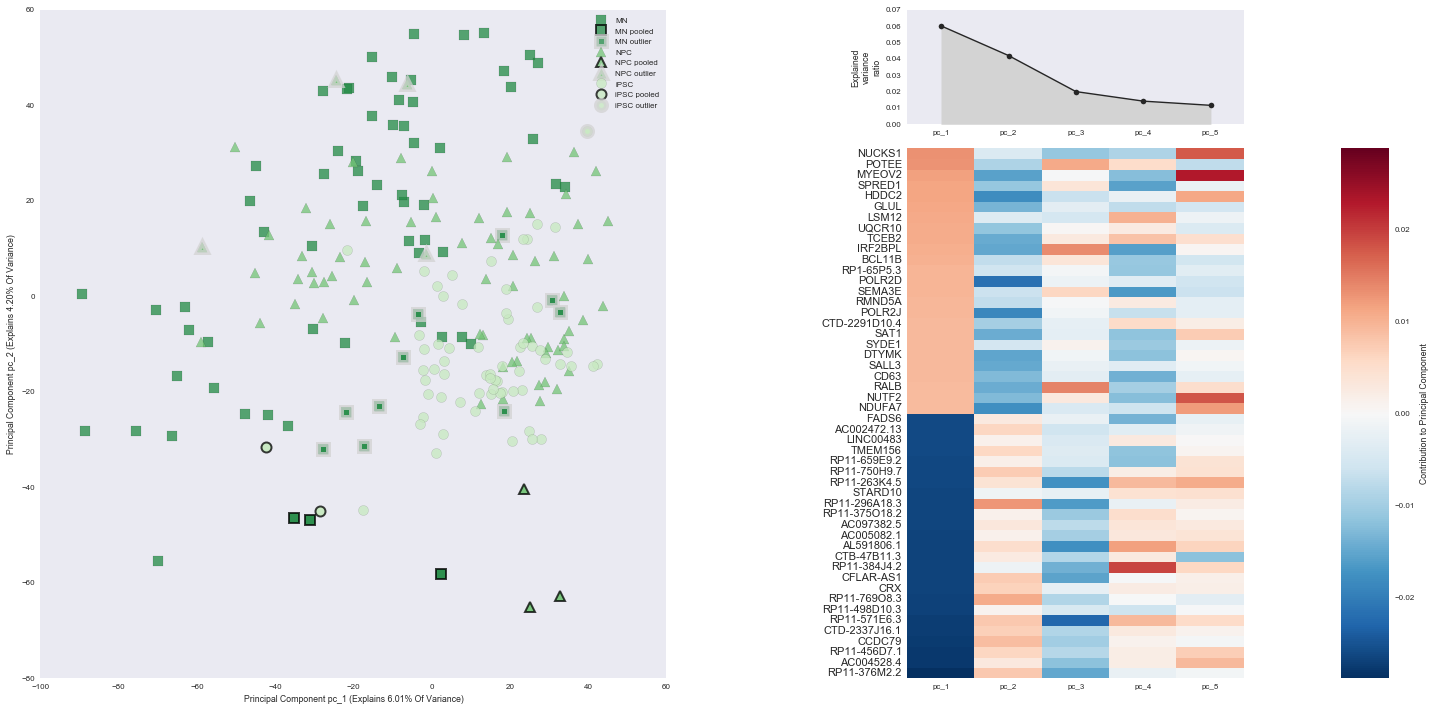

In [12]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_expression_pca.pdf'.format(folder))

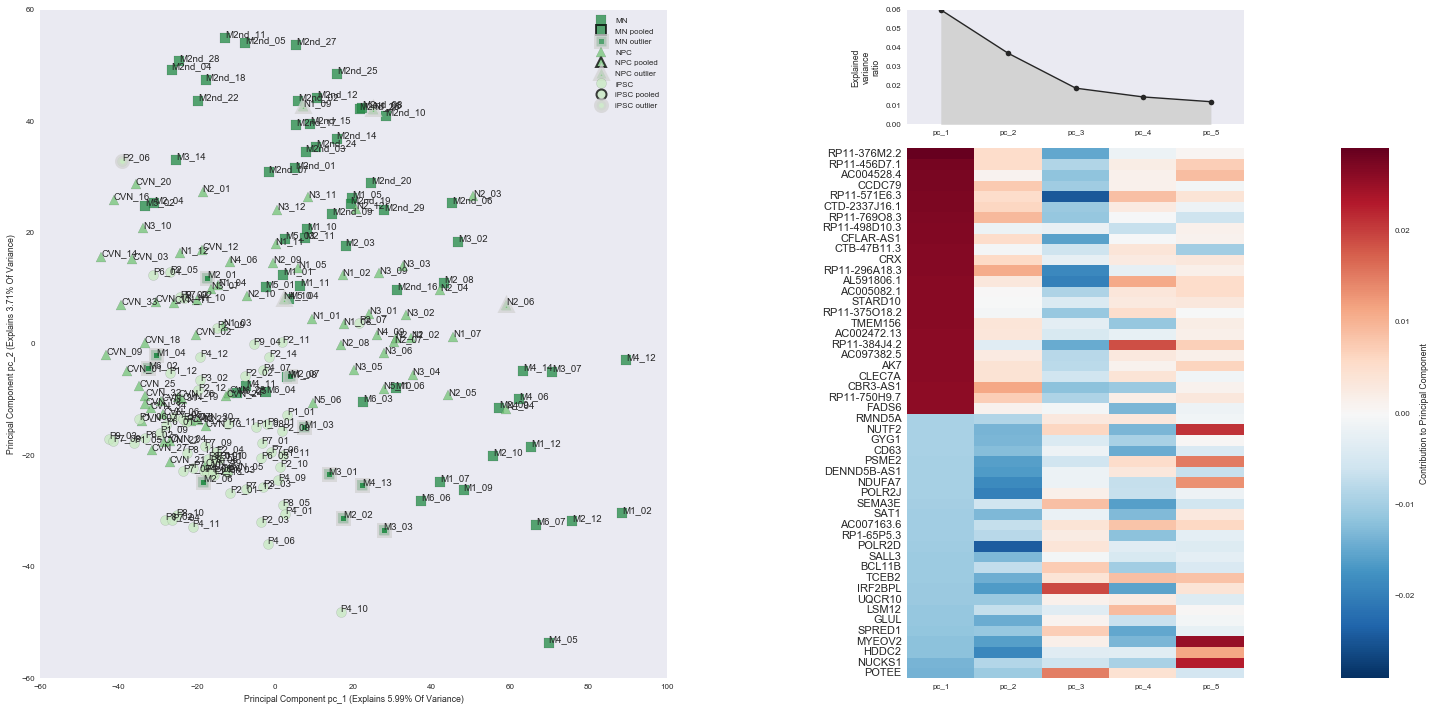

In [13]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False, show_point_labels=True, sample_subset='~pooled')

### PCA of constitutively expressed splicing events

### Get the splicing events

In [14]:
non_de_event_names = study.splicing.expression_to_splicing_id(non_de_genes)

### Plot PCA

In [15]:
study.metadata.data.columns

Index([u'single', u'pooled', u'phenotype', u'neuron', u'progenitor',
       u'stressed', u'craig_venter', u'differentiation_batch', u'split',
       u'outlier'],
      dtype='object')

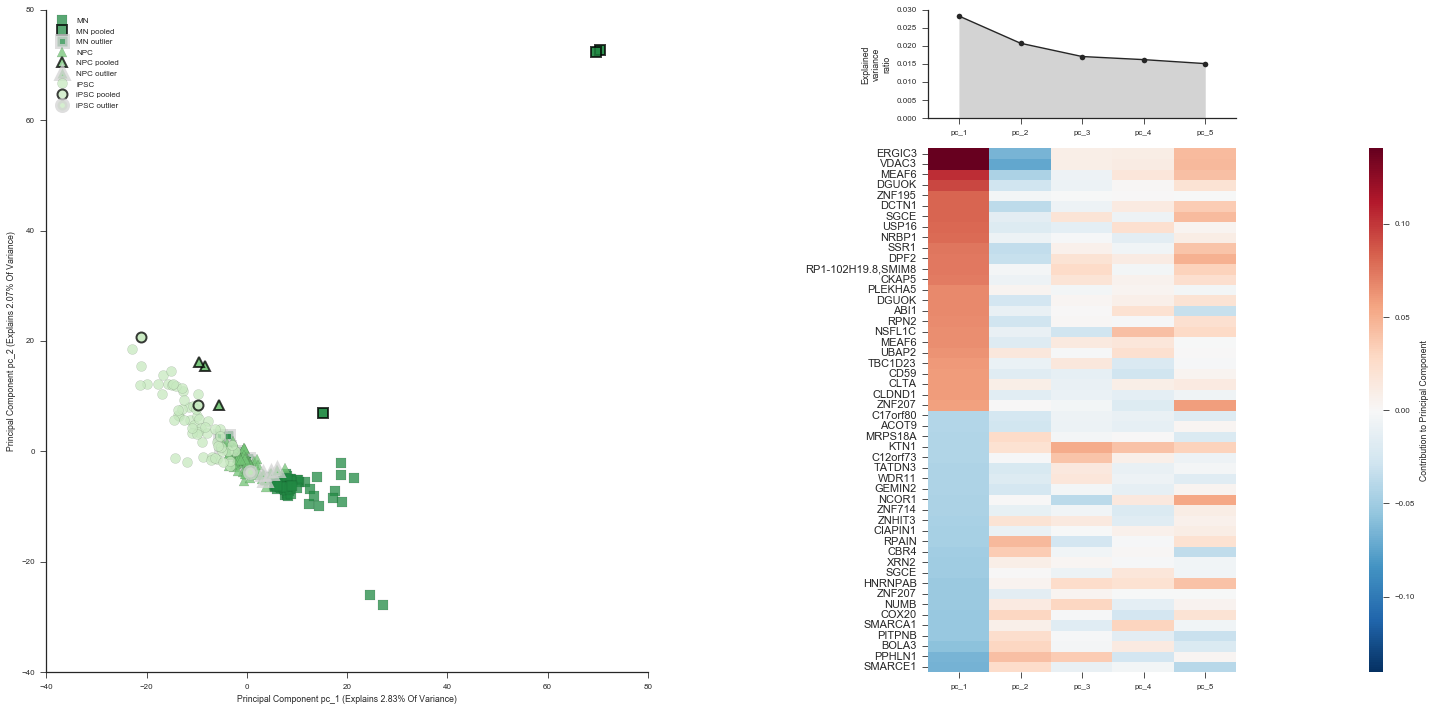

In [16]:
sns.set(style='ticks', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_splicing_pca.pdf'.format(folder))

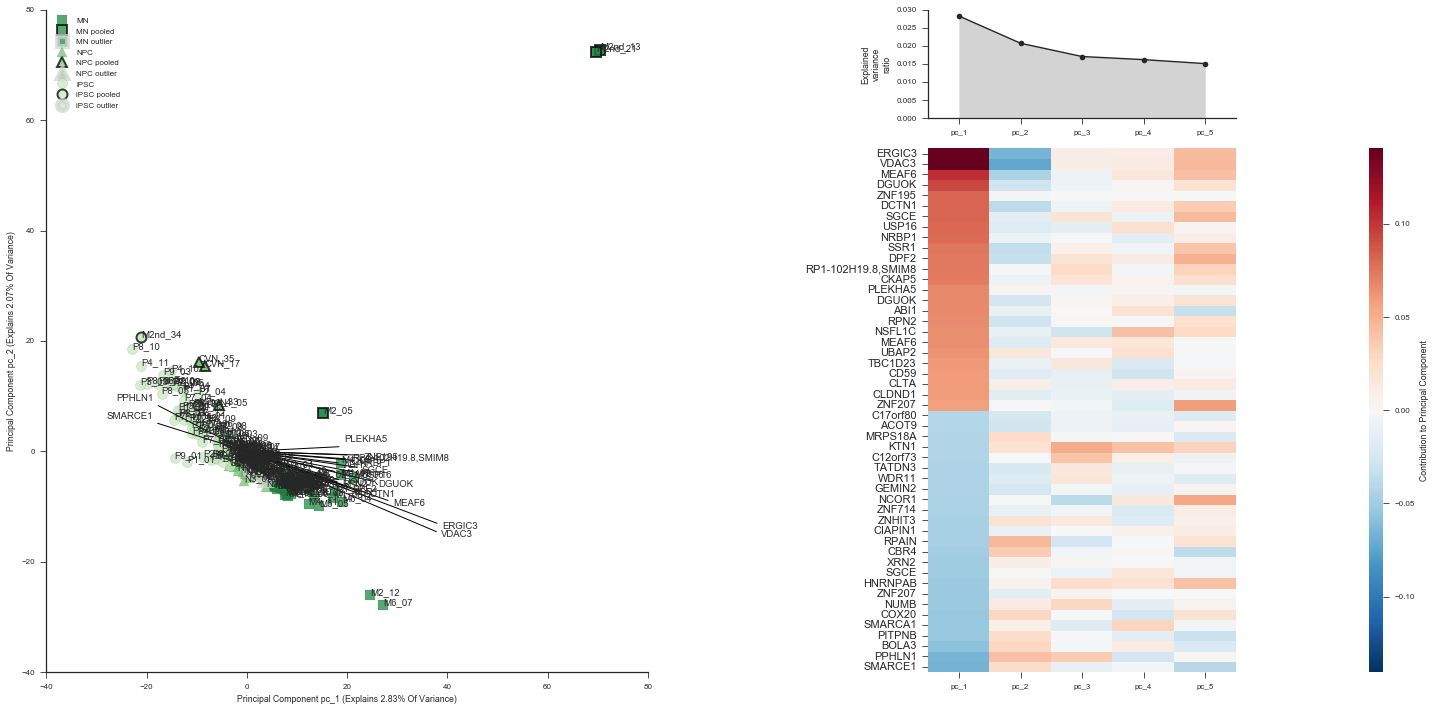

In [17]:
sns.set(style='ticks', context='paper')
study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_point_labels=True)

5501


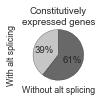

In [18]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[non_de_event_names].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = pd.Index(non_de_genes).difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(1.5, 1.5))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Greys', n_colors=2),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Constitutively\nexpressed genes')
fig.tight_layout()
fig.savefig('{}/constitutively_expressed_genes_percentage_genes_with_events.pdf'.format(folder))


### Number of splicing events in all expressed genes

5850


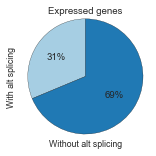

In [19]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[study.splicing.data.columns].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = study.expression.data.columns.difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Expressed genes')
fig.tight_layout()
fig.savefig('{}/percentage_genes_with_events.pdf'.format(folder))


In [20]:
sns.set(style='ticks', context='paper')

                     test_statistic   p_value
group2    group1                             
RBP       All genes       1054745.0  0.000029
          TF                67296.5  0.000033
          lincRNA            9326.5  0.006102
All genes TF              1098341.5  0.159847
          lincRNA          152365.5  0.180711
lincRNA   TF                12098.5  0.410052


/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


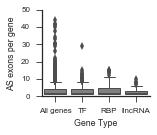

In [21]:
tf_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_tf']].dropna()
rbp_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_rbp_target_mrna']].dropna()
lincrna_events = event_per_genes[study.expression.feature_subsets['transcript_type: lincRNA']].dropna()

all_genes_events = event_per_genes.reset_index()
all_genes_events['Gene Type'] = 'All genes'

tf_events = tf_events.reset_index()
tf_events['Gene Type'] = 'TF'

rbp_events = rbp_events.reset_index()
rbp_events['Gene Type'] = 'RBP'

lincrna_events = lincrna_events.reset_index()
lincrna_events['Gene Type'] = 'lincRNA'

events_per_gene_type = pd.concat([all_genes_events, tf_events, rbp_events, lincrna_events])
events_per_gene_type = events_per_gene_type.rename(columns={0:'AS exons per gene'})

fig, ax = plt.subplots(figsize=(2.25, 2))
sns.boxplot(x='Gene Type', y='AS exons per gene', data=events_per_gene_type, linewidth=1, color='grey')
sns.despine()
ax.locator_params('y', nbins=5)
# ax.set_ylim(0, 100)

from scipy.stats import mannwhitneyu
import itertools

grouped = events_per_gene_type.groupby('Gene Type')
groups = grouped.groups.keys()

comparisons = itertools.combinations(groups, 2)

col = 'AS exons per gene'

results = []
for group1, group2 in comparisons:
    test_statistic, p_value = mannwhitneyu(grouped.get_group(group1)[col], grouped.get_group(group2)[col])
    results.append([group1, group2, test_statistic, p_value])

columns = ['group1', 'group2', 'test_statistic', 'p_value']

mannwhitney_results = pd.DataFrame(results, columns=columns)
mannwhitney_results = mannwhitney_results.set_index(['group2', 'group1']).sort_index()
print mannwhitney_results.sort('p_value')
# ## Know that RBP-everything else is significant, so plot those
# others = ('All genes', 'TF', 'lincRNA')
# xticklabels = [x.get_text() for x in ax.get_xticklabels()]
# rbp_i = xticklabels.index('RBP')

# ymax = grouped[col].max().max()

# offset = 0
# yrange = ymax - grouped[col].min().min()
# offset_interval = yrange*0.1
# for i, other in enumerate(others):
#     offset = offset_interval*(i+1)
#     other_i = xticklabels.index(other)
#     ax.annotate("", xy=(rbp_i, ymax+offset), xycoords='data',
#                xytext=(other_i, ymax+offset), textcoords='data',
#                arrowprops=dict(arrowstyle="-", ec='#444444',
#                                connectionstyle="bar,fraction=0.08"))
#     middle = abs((rbp_i + other_i)/2.)
#     ax.text(middle, ymax + offset, '***',
#            horizontalalignment='center',
#            verticalalignment='center', fontsize=16)
# ax.set(xlabel='*** $p<10^{-10}$')
fig.tight_layout()
fig.savefig('{}/splicing_events_per_gene.pdf'.format(folder))

## Lavalamp plots

In [22]:
study.splicing.data.shape

(204, 16360)

In [23]:
singles_no_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
print len(singles_no_outliers)

splicing_singles = study.splicing.data.loc[singles_no_outliers]
splicing_singles_count = splicing_singles.groupby(study.sample_id_to_phenotype).count()
ten_per_celltype = (splicing_singles_count >= 10).any(axis=0)
splicing10 = study.splicing.data[ten_per_celltype[ten_per_celltype].index]
print splicing10.shape

181
(204, 12894)


In [24]:
sns.set(context='paper', style='ticks')

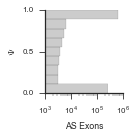

In [25]:
fig, ax = plt.subplots(figsize=(2, 2))
plt.xscale('log', nonposx='clip')
sns.distplot(splicing10.values.flat, bins=np.linspace(0, 1,10), color='grey', kde=False, vertical=True, 
             hist_kws=dict(range=(0, 1)))
ax.set(yticks=(0, 0.5, 1), ylabel='$\Psi$', xlabel='AS Exons')
sns.despine()
fig.tight_layout()
fig.savefig('{}/splicing10_per_celltype_distplot.pdf'.format(folder))

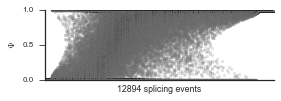

In [26]:
fig, ax = plt.subplots(figsize=(4, 1.5))
flotilla.visualize.splicing.lavalamp(splicing10, color='grey', ax=ax, markersize=3)
# fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/splicing10_per_celltype_lavalamp_all.png'.format(folder))

In [27]:
sns.set(context='paper', style='ticks')

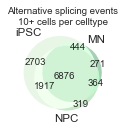

In [28]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh=10, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in splicing10.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\n10+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/shared_events_venn10_per_phenotype.pdf'.format(folder))

In [29]:
events_per_phenotype_count

MN       7955
NPC      9476
iPSC    11940
dtype: int64